# Keras models visualizations

In [1]:
import numpy as np
np.random.seed(1337)
import datetime
from IPython.display import SVG
from keras.datasets import mnist
from keras import activations
from keras.layers import Dense, Input, concatenate, Conv1D, Conv2D, Dropout, MaxPooling1D, MaxPooling2D
from keras.layers import Dense, Flatten
from keras.models import Sequential, load_model
from keras.utils import plot_model
from keras.utils.vis_utils import model_to_dot
from matplotlib import gridspec
from matplotlib.ticker import NullFormatter, NullLocator, MultipleLocator
from scipy import stats
from sklearn.metrics import auc, roc_curve
from sklearn.model_selection import train_test_split
from vis.utils import utils
from vis.visualization import visualize_activation
from vis.visualization import visualize_saliency
import datetime
import keras
import matplotlib.pylab as plt
import pandas as pd
import seaborn as sns
import talos as ta
sns.set_palette('husl')
sns.set(style='ticks')

Using TensorFlow backend.


In [2]:
%matplotlib inline
plt.rcParams["figure.figsize"] = [8, 8]

For the purposes of this notebook, a simple model is constructed.

In [3]:
num_classes = 2
model = Sequential()
model.add(Conv1D(32, (5), strides = (1), input_shape = (18, 1), activation = 'tanh'))
model.add(MaxPooling1D(pool_size = (2), strides = (2)))
model.add(Conv1D(32, (3), strides = (1), input_shape = (18, 1), activation = 'tanh'))
model.add(Flatten())
model.add(Dense(300,                                            activation = 'tanh'))
model.add(Dropout(rate = 0.5))
model.add(Dense(300,                                            activation = 'tanh'))
model.add(Dropout(rate = 0.5))
model.add(Dense(num_classes,                                    activation = 'softmax', name = "preds"))
model.compile(loss="categorical_crossentropy", optimizer="nadam", metrics=['accuracy'])

Model checkpoints can be saved during training. They are usually saved in the HDF5 format.

A callback to make regular saves of a model to separate files could be something like the following:

In [4]:
checkpoint = keras.callbacks.ModelCheckpoint(
    filepath       = 'best_model.{epoch:02d}-{val_loss:.2f}.h5',
    monitor        = 'val_loss',
    save_best_only = True
)

To save only the latest model in training, something like the following callback could be used:

In [5]:
checkpoint = keras.callbacks.ModelCheckpoint(
    filepath       = 'model_latest.h5',
    monitor        = 'val_loss',
    save_best_only = True
)

A saved HDF5 file can be loaded as a model in a way like the following:

In [6]:
from keras.models import load_model
model = load_model('model.h5')

A model can be summarized in a way like the following:

In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 14, 32)            192       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 7, 32)             0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 5, 32)             3104      
_________________________________________________________________
flatten_1 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 300)               48300     
_________________________________________________________________
dropout_1 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 300)               90300     
__________

An SVG of the model can be displayed in Jupyter in a way like the following:

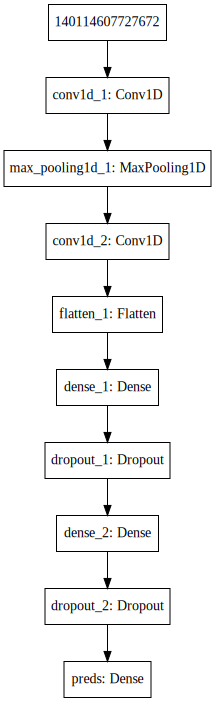

In [8]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))

The layers of a model can be accessed:

In [9]:
model.layers

The configuration of an individual layer can be inspected:

In [10]:
model.layers[8].get_config()

{'name': 'preds',
 'trainable': True,
 'units': 2,
 'activation': 'softmax',
 'use_bias': True,
 'kernel_initializer': {'class_name': 'VarianceScaling',
  'config': {'scale': 1.0,
   'mode': 'fan_avg',
   'distribution': 'uniform',
   'seed': None}},
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'kernel_regularizer': None,
 'bias_regularizer': None,
 'activity_regularizer': None,
 'kernel_constraint': None,
 'bias_constraint': None}

The weights of an individual layer can be accessed:

In [11]:
model.layers[8].get_weights()

[array([[-1.54346889e-02, -4.09361273e-02],
        [ 1.18178502e-01,  7.37368241e-02],
        [-2.22048983e-02, -2.92957984e-02],
        [ 7.10353255e-02,  8.12863484e-02],
        [ 8.12057927e-02,  6.16306365e-02],
        [-4.54515107e-02,  1.85460076e-02],
        [-1.00519255e-01, -1.17523253e-01],
        [ 3.86601649e-02,  2.84605660e-04],
        [-1.00282244e-01, -1.16237894e-01],
        [-3.05645820e-02, -1.54068042e-02],
        [-1.07497334e-01, -6.00119010e-02],
        [ 6.56699017e-02,  1.07942887e-01],
        [ 1.13617092e-01,  1.19311459e-01],
        [-5.81941605e-02, -2.40692794e-02],
        [ 4.19453047e-02,  2.89205648e-02],
        [-1.00112766e-01, -1.24896593e-01],
        [ 3.46357152e-02,  9.88704059e-03],
        [-2.05151066e-02,  1.13300676e-03],
        [ 3.61257568e-02,  1.88629907e-02],
        [-1.76935587e-02, -5.56522980e-02],
        [ 6.69789985e-02,  8.12992677e-02],
        [ 5.28590232e-02,  1.05726771e-01],
        [-4.94585149e-02,  3.627